# Quiz Project Streamlit:
- **Nama:** Rayhan Ramdhany Hanaputra
- **Dataset:** Dataset yang digunakan merupakan berita dari Pemilu 2024. Akan dilakukan proses EDA untuk mengetahui seberapa ragam berita terkait pasangan calon (paslon) presiden-wakil presiden. Selain itu juga akan dilakukan prediksi menggunakan NLP untuk mengetahui berita tersebut membahas terkait paslon yang mana saja.
https://www.kaggle.com/datasets/ariffaizin/indonesia-election-news-berita-pemilu-2024/data

## Menentukan Pertanyaan Bisnis

- Pertanyaan 1
Seberapa banyak berita terkait pasangan calon tersebut yang dibahas dalam berita?
- Pertanyaan 2
Seberapa besar hasil klasifikasi berita pemilu dengan metode LSTM?

## Import Semua Packages/Library yang Digunakan

In [1]:
!pip install wordcloud

In [2]:
import pandas as pd
import re
import string
from wordcloud import WordCloud
import matplotlib.pyplot as plt

## Data Wrangling

### Gathering Data

In [3]:
df = pd.read_csv('/content/datasets/news_data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19813 entries, 0 to 19812
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         19811 non-null  object
 1   author        19812 non-null  object
 2   publish_date  19813 non-null  object
 3   article_text  19812 non-null  object
 4   url           19813 non-null  object
 5   main_image    17937 non-null  object
 6   tag           19813 non-null  object
dtypes: object(7)
memory usage: 1.1+ MB


In [4]:
df.head()

,title,author,publish_date,article_text,url,main_image,tag
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,detikNews,2023-12-10 23:31:00+07:00,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,https://news.detik.com/pemilu/d-7082492/hasto-...,https://awsimages.detik.net.id/community/media...,"['hasto kristiyanto', 'hasto', 'sekjen pdip', ..."
1,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",detikNews,2023-12-10 23:09:00+07:00,Mantan Ketua Umum Pengurus Besar Nahdlatul Ula...,https://news.detik.com/pemilu/d-7082483/terima...,NaN,"['said aqil siradj', 'gibran rakabuming', 'pem..."
2,Contoh Format dan Isi Surat Pernyataan Anggota...,detikNews,2023-12-10 22:38:00+07:00,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,https://news.detik.com/pemilu/d-7082424/contoh...,https://awsimages.detik.net.id/community/media...,"['surat pernyataan kpps pemilu 2024', 'pendaft..."
3,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,detikSumut,2023-12-10 22:23:00+07:00,Sekitar 9.000 personel dikerahkan untuk mengam...,https://www.detik.com/sumut/berita/d-7082448/9...,https://awsimages.detik.net.id/community/media...,"['natal', 'tahun baru', 'nataru', 'pengamanan ..."
4,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,detikNews,2023-12-10 22:12:00+07:00,Ukraina marah usai Rusia menjadikan empat wila...,https://news.detik.com/internasional/d-7082454...,https://awsimages.detik.net.id/community/media...,"['ukraina', 'rusia', 'pemilu rusia', 'round-up']"


### Assessing Data

In [6]:
df = df.loc[:,["title","article_text","publish_date"]]
#df['publish_date'] = pd.to_datetime(df['publish_date'], format='%A, %d %b %Y %H:%M WIB', dayfirst=True, errors='coerce')
#df = df[df['title'] != '-']
df['publish_date'] = pd.to_datetime(df['publish_date'], format='%Y-%m-%d %H:%M:%S%z', errors='coerce')
df['year'] = df['publish_date'].dt.year
df['month'] = df['publish_date'].dt.month
#df['month'] = df['publish_date'].dt.strftime('%B')
df['date'] = df['publish_date'].dt.day
df['time'] = df['publish_date'].dt.time

In [7]:
df.tail(10)

,title,article_text,publish_date,year,month,date,time
19803,Apa Kabar Wacana Koalisi Perubahan?,Poros 'Koalisi Perubahan' yang digodok Partai ...,2023-01-02 18:03:00+07:00,2023,1,2,18:03:00
19804,"Paloh dan Salim Segaf Bertemu Awal Februari, B...",Partai NasDem mengagendakan pertemuan Ketua Um...,2023-01-02 18:01:00+07:00,2023,1,2,18:01:00
19805,NasDem Yakin Publik Cerdas Maknai Unggahan Ani...,Eks Gubernur DKI Jakarta Anies Baswedan membag...,2023-01-02 16:12:00+07:00,2023,1,2,16:12:00
19806,"Anies Nonton Dokumenter Ini, Teringat Pelemaha...",Eks Gubernur DKI Jakarta Anies Baswedan membag...,2023-01-02 13:42:00+07:00,2023,1,2,13:42:00
19807,Mencegah Keterbelahan Masyarakat di Pilpres 2024,Memasuki tahun politik tahun 2003 dan menjelan...,2023-01-02 11:23:00+07:00,2023,1,2,11:23:00
19808,Alkisah Romahurmuziy Kembali Mesra dengan Part...,Sekonyong-konyong eks Ketum PPP Romahurmuziy m...,2023-01-02 07:53:00+07:00,2023,1,2,07:53:00
19809,"PKS Harap RI Terhindar dari Resesi di 2023, Ta...",Partai Keadilan Sejahtera (PKS) menyampaikan r...,2023-01-01 11:45:00+07:00,2023,1,1,11:45:00
19810,Resolusi PKB di 2023: Cak Imin Maju Capres hin...,Indonesia sudah memasuki Tahun Baru 2023. Semu...,2023-01-01 10:14:00+07:00,2023,1,1,10:14:00
19811,Menerka Antara Puan atau Ganjar Capres yang Ak...,Ketua Umum PDIP Megawati Soekarnoputri disebut...,2023-01-01 07:46:00+07:00,2023,1,1,07:46:00
19812,Lelet Beleid Perampasan Aset Koruptor,Naskah akademik dan draf RUU Perampasan Aset T...,2015-04-04 23:53:00+07:00,2015,4,4,23:53:00


In [8]:
count_df = df.groupby(['month']).size().reset_index(name='title_count')
sorted_df = count_df.sort_values(by=['month'])
print(sorted_df)

    month  title_count
0       1          429
1       2          521
2       3          399
3       4          662
4       5         1132
5       6         1099
6       7         1228
7       8         2305
8       9         2848
9      10         3835
10     11         3941
11     12         1414


## Exploratory Data Analysis (EDA)

### Explore ...

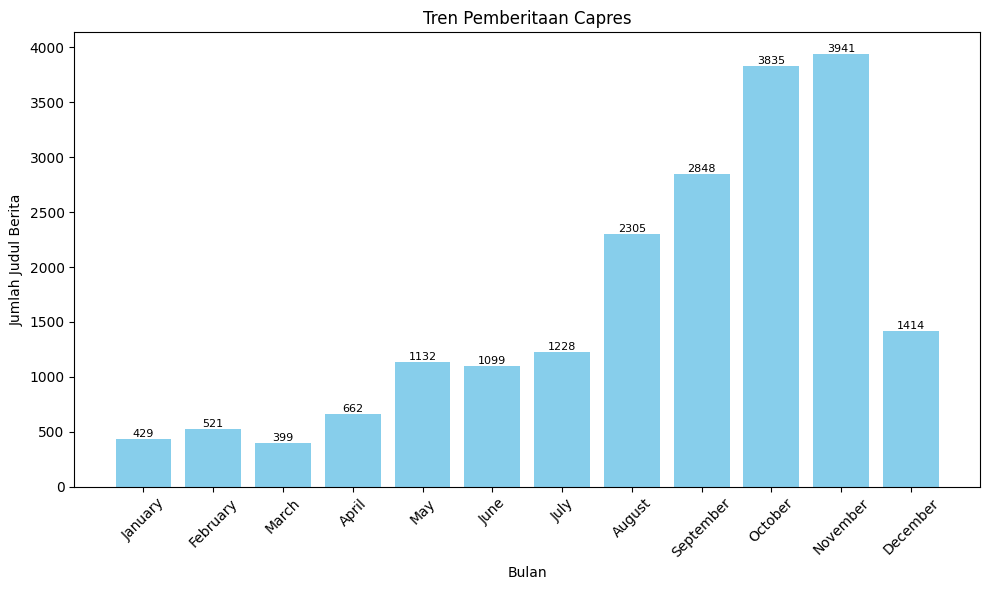

In [9]:
month_mapping = {
    1: 'January',
    2: 'February',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'June',
    7: 'July',
    8: 'August',
    9: 'September',
    10: 'October',
    11: 'November',
    12: 'December'
}

# BAR CHART
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_df.index + 1, sorted_df['title_count'], color='skyblue')  # Use index + 1 as x-values

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres')

# Change x-axis labels to month names based on the mapping
plt.xticks(sorted_df.index + 1, [month_mapping[i] for i in sorted_df.index + 1], rotation=45)

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

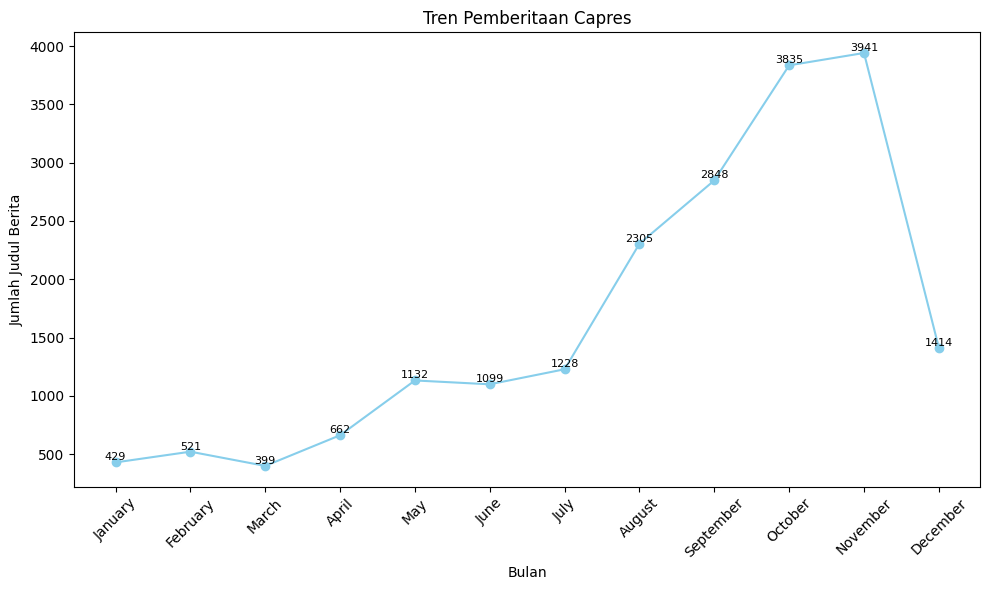

In [10]:
plt.figure(figsize=(10, 6))

# Plotting the line chart
plt.plot(sorted_df['month'], sorted_df['title_count'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres')
#plt.xticks(rotation=45)
plt.xticks(sorted_df.index + 1, [month_mapping[i] for i in sorted_df.index + 1], rotation=45)

# Adding data labels to points
for i, txt in enumerate(sorted_df['title_count']):
    plt.annotate(txt, (sorted_df['month'].iloc[i], sorted_df['title_count'].iloc[i]), ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

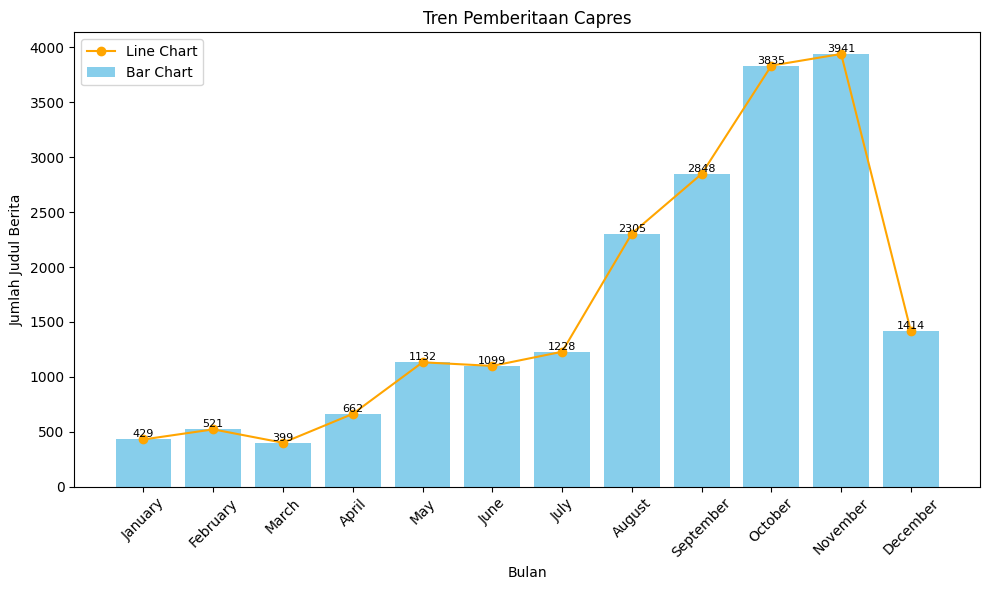

In [11]:
plt.figure(figsize=(10, 6))

# Plotting the bar chart
bars = plt.bar(sorted_df['month'], sorted_df['title_count'], color='skyblue', label='Bar Chart')

# Plotting the line chart
plt.plot(sorted_df['month'], sorted_df['title_count'], marker='o', linestyle='-', color='orange', label='Line Chart')

plt.xlabel('Bulan')
plt.ylabel('Jumlah Judul Berita')
plt.title('Tren Pemberitaan Capres')
#plt.xticks(rotation=45)
plt.xticks(sorted_df.index + 1, [month_mapping[i] for i in sorted_df.index + 1], rotation=45)

# Adding labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(yval, 2), ha='center', va='bottom', fontsize=8)

plt.legend()  # Show legend
plt.tight_layout()
plt.show()

### Cleaning Data

In [12]:
def preprocess_text(kalimat):
    # Mengubah kalimat menjadi huruf kecil
    #lower_case = kalimat.lower()
    if isinstance(kalimat, str):
        # Mengubah kalimat menjadi huruf kecil
        lower_case = kalimat.lower()
        # Menghapus angka dari kalimat
        #hasil = re.sub(r"\d+", "", lower_case)
        hasil = re.sub(r'[,()\d]+', '', lower_case)

        return hasil
    else:
        return kalimat

    # Menghapus hashtag
    hasil = re.sub(r'#\w+', '', hasil)
    hasil = re.sub(r'@\w+', '', hasil)
    hasil = re.sub(r"(?:\@|http?\://|https?\://|www)\S+", "", hasil)

    # Menghapus tanda baca dari kalimat
    hasil = hasil.translate(str.maketrans("", "", string.punctuation))

    # Menghapus spasi pada awal dan akhir kalimat
    hasil = hasil.strip()

    # Menghilangkan Tanda Baca
    hasil = hasil.translate(str.maketrans('', '', string.punctuation))

    # Mengganti karakter HTML dengan tanda petik
    hasil = re.sub('<.*?>', ' ', hasil)

    # Mempertimbangkan huruf dan angka
    hasil = re.sub('[^a-zA-Z0-9]', ' ', hasil)

    # Mengganti line baru dengan spasi
    hasil = re.sub("\n", " ", hasil)

    # Menghapus single char
    hasil = re.sub(r"\b[a-zA-Z]\b", " ", hasil)

    # Memisahkan dan menggabungkan kata
    hasil = ' '.join(hasil.split())

    return hasil

In [13]:
df['merged_text'] = df['title'] + ' ' + df['article_text']

# DO PREPROCESSING
df['merged_text_pre'] = df['merged_text'].apply(preprocess_text)
df.head()

,title,article_text,publish_date,year,month,date,time,merged_text,merged_text_pre
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,2023-12-10 23:31:00+07:00,2023,12,10,23:31:00,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,hasto ingin debat pilpres pertarungan gagasan ...
1,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",Mantan Ketua Umum Pengurus Besar Nahdlatul Ula...,2023-12-10 23:09:00+07:00,2023,12,10,23:09:00,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",terima kunjungan gibran di ponpes al-tsaqafah ...
2,Contoh Format dan Isi Surat Pernyataan Anggota...,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,2023-12-10 22:38:00+07:00,2023,12,10,22:38:00,Contoh Format dan Isi Surat Pernyataan Anggota...,contoh format dan isi surat pernyataan anggota...
3,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,Sekitar 9.000 personel dikerahkan untuk mengam...,2023-12-10 22:23:00+07:00,2023,12,10,22:23:00,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,ribu personel gabungan dikerahkan amankan nat...
4,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,Ukraina marah usai Rusia menjadikan empat wila...,2023-12-10 22:12:00+07:00,2023,12,10,22:12:00,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,amarah ukraina usai rusia bakal gelar pilpres ...


In [14]:
def label_words_in_dataframe(df, column_name, filename):
    labels_df = pd.read_csv(filename)

    # Ubah DataFrame menjadi dictionary
    keyword_to_label = labels_df.set_index('keyword')['label'].to_dict()
    labeled_data = []

    for sentence in df[column_name]:
        # Pisahkan kalimat menjadi kata-kata
        words = sentence.split(' ')
        # Inisialisasi list kosong untuk menyimpan label kata dalam kalimat
        labels = []
        # Iterasi melalui kata-kata dalam kalimat
        for word in words:
            # Jika kata adalah kata kunci, berikan label yang sesuai
            if word in keyword_to_label:
                labels.append(keyword_to_label[word])

        # Gabungkan label menjadi string dan tambahkan ke data yang telah diberi label
        labeled_data.append(' '.join(labels))

    # Tambahkan data yang telah diberi label sebagai kolom baru ke DataFrame Anda
    df['category'] = labeled_data

    return df

In [15]:
filename = '/content/datasets/label_map.csv'
df['merged_text_pre'] = df['merged_text_pre'].astype(str) # Convert the column to string type
df = label_words_in_dataframe(df, 'merged_text_pre', filename)
df.head(10)

,title,article_text,publish_date,year,month,date,time,merged_text,merged_text_pre,category
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,2023-12-10 23:31:00+07:00,2023,12,10,23:31:00,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,hasto ingin debat pilpres pertarungan gagasan ...,Paslon 3
1,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",Mantan Ketua Umum Pengurus Besar Nahdlatul Ula...,2023-12-10 23:09:00+07:00,2023,12,10,23:09:00,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",terima kunjungan gibran di ponpes al-tsaqafah ...,Paslon 2 Paslon 2 Paslon 2 Paslon 1
2,Contoh Format dan Isi Surat Pernyataan Anggota...,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,2023-12-10 22:38:00+07:00,2023,12,10,22:38:00,Contoh Format dan Isi Surat Pernyataan Anggota...,contoh format dan isi surat pernyataan anggota...,
3,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,Sekitar 9.000 personel dikerahkan untuk mengam...,2023-12-10 22:23:00+07:00,2023,12,10,22:23:00,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,ribu personel gabungan dikerahkan amankan nat...,
4,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,Ukraina marah usai Rusia menjadikan empat wila...,2023-12-10 22:12:00+07:00,2023,12,10,22:12:00,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,amarah ukraina usai rusia bakal gelar pilpres ...,
5,TKN Prabowo-Gibran Buka Pintu untuk Eks KSAD D...,Sekretaris Tim Kampanye Nasional (TKN) Prabowo...,2023-12-10 21:59:00+07:00,2023,12,10,21:59:00,TKN Prabowo-Gibran Buka Pintu untuk Eks KSAD D...,tkn prabowo-gibran buka pintu untuk eks ksad d...,Paslon 2 Paslon 2 Paslon 2 Paslon 2
6,Gibran Dadakan Makan Gultik di Blok M Malam In...,Cawapres nomor urut 2 Gibran Rakabuming Raka m...,2023-12-10 21:51:00+07:00,2023,12,10,21:51:00,Gibran Dadakan Makan Gultik di Blok M Malam In...,gibran dadakan makan gultik di blok m malam in...,Paslon 2 Paslon 2 Paslon 2 Paslon 2 Paslon 2 P...
7,TPN Ganjar-Mahfud Anggap Dukungan Abuya Muhtad...,Sekretaris Tim Pemenangan Nasional (TPN) capre...,2023-12-10 21:45:00+07:00,2023,12,10,21:45:00,TPN Ganjar-Mahfud Anggap Dukungan Abuya Muhtad...,tpn ganjar-mahfud anggap dukungan abuya muhtad...,Paslon 3 Paslon 2 Paslon 2 Paslon 3 Paslon 3 P...
8,"TKN: Prabowo ke Marapi Sebagai Menhan, Wajar N...",Tim Kampanye Nasional (TKN) menegaskan kapasit...,2023-12-10 21:32:00+07:00,2023,12,10,21:32:00,"TKN: Prabowo ke Marapi Sebagai Menhan, Wajar N...",tkn: prabowo ke marapi sebagai menhan wajar na...,Paslon 2 Paslon 2 Paslon 2 Paslon 2 Paslon 2 P...
9,Prabowo-Gibran Siap Hadapi Debat Pertama Pilpr...,Pasangan capres dan cawapres nomor urut 2 Prab...,2023-12-10 21:31:00+07:00,2023,12,10,21:31:00,Prabowo-Gibran Siap Hadapi Debat Pertama Pilpr...,prabowo-gibran siap hadapi debat pertama pilpr...,Paslon 2 Paslon 2 Paslon 2 Paslon 2 Paslon 2 P...


In [16]:
#filter kata
words_to_count = ["Paslon 1", "Paslon 2", "Paslon 3"]
# Convert 'Keterangan' column to lowercase for case-insensitive counting
df['category'] = df['category'].str.lower()

# Count occurrences of each word
word_counts = {word: df['category'].str.count(word.lower()).sum() for word in words_to_count}

# Display the counts for each word
for word, count in word_counts.items():
    print(f"The word '{word}' appears {count} times.")

The word 'Paslon 1' appears 46010 times.
The word 'Paslon 2' appears 61248 times.
The word 'Paslon 3' appears 45133 times.


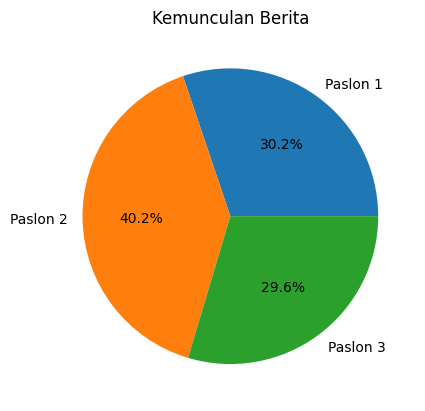

In [17]:
total_count = sum(word_counts.values())

# Calculate the percentages
percentages = [count/total_count * 100 for count in word_counts.values()]

# Plot the pie chart
plt.pie(percentages, labels=word_counts.keys(), autopct='%1.1f%%')
plt.title('Kemunculan Berita')
plt.show()

In [18]:
import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

def tokenize_text(kalimat):
    if isinstance(kalimat, str):
        tokens = nltk.tokenize.word_tokenize(kalimat)
        return tokens
    else:
        return []

df['token'] = df['merged_text_pre'].fillna('').apply(tokenize_text)
df.head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


,title,article_text,publish_date,year,month,date,time,merged_text,merged_text_pre,category,token
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,2023-12-10 23:31:00+07:00,2023,12,10,23:31:00,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,hasto ingin debat pilpres pertarungan gagasan ...,paslon 3,"[hasto, ingin, debat, pilpres, pertarungan, ga..."
1,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",Mantan Ketua Umum Pengurus Besar Nahdlatul Ula...,2023-12-10 23:09:00+07:00,2023,12,10,23:09:00,"Terima Kunjungan Gibran di Ponpes Al-Tsaqafah,...",terima kunjungan gibran di ponpes al-tsaqafah ...,paslon 2 paslon 2 paslon 2 paslon 1,"[terima, kunjungan, gibran, di, ponpes, al-tsa..."
2,Contoh Format dan Isi Surat Pernyataan Anggota...,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,2023-12-10 22:38:00+07:00,2023,12,10,22:38:00,Contoh Format dan Isi Surat Pernyataan Anggota...,contoh format dan isi surat pernyataan anggota...,,"[contoh, format, dan, isi, surat, pernyataan, ..."
3,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,Sekitar 9.000 personel dikerahkan untuk mengam...,2023-12-10 22:23:00+07:00,2023,12,10,22:23:00,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,ribu personel gabungan dikerahkan amankan nat...,,"[ribu, personel, gabungan, dikerahkan, amankan..."
4,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,Ukraina marah usai Rusia menjadikan empat wila...,2023-12-10 22:12:00+07:00,2023,12,10,22:12:00,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,amarah ukraina usai rusia bakal gelar pilpres ...,,"[amarah, ukraina, usai, rusia, bakal, gelar, p..."


In [19]:
def stopword_text(tokens):
    stopwords = pd.read_csv('/content/datasets/indostop.txt', header=None)[0].tolist()
    cleaned_tokens = []
    for token in tokens:
        if token not in stopwords:
            cleaned_tokens.append(token)
    return cleaned_tokens

df['token_clean'] = df['token'].apply(stopword_text)

In [20]:
print(df['token_clean'],10)
print(df['token'],10)

0        [hasto, ingin, debat, pilpres, pertarungan, ga...
1        [terima, kunjungan, gibran, di, ponpes, al-tsa...
2        [contoh, format, dan, isi, surat, pernyataan, ...
3        [ribu, personel, gabungan, dikerahkan, amankan...
4        [amarah, ukraina, usai, rusia, bakal, gelar, p...
                               ...                        
19808    [alkisah, romahurmuziy, kembali, mesra, dengan...
19809    [pks, harap, ri, terhindar, dari, resesi, di, ...
19810    [resolusi, pkb, di, :, cak, imin, maju, capres...
19811    [menerka, antara, puan, atau, ganjar, capres, ...
19812    [lelet, beleid, perampasan, aset, koruptor, na...
Name: token_clean, Length: 19813, dtype: object 10
0        [hasto, ingin, debat, pilpres, pertarungan, ga...
1        [terima, kunjungan, gibran, di, ponpes, al-tsa...
2        [contoh, format, dan, isi, surat, pernyataan, ...
3        [ribu, personel, gabungan, dikerahkan, amankan...
4        [amarah, ukraina, usai, rusia, bakal, gelar, p...
     

## Visualization & Explanatory Analysis

### Pertanyaan 1: Seberapa banyak berita terkait pasangan calon tersebut yang dibahas dalam berita?

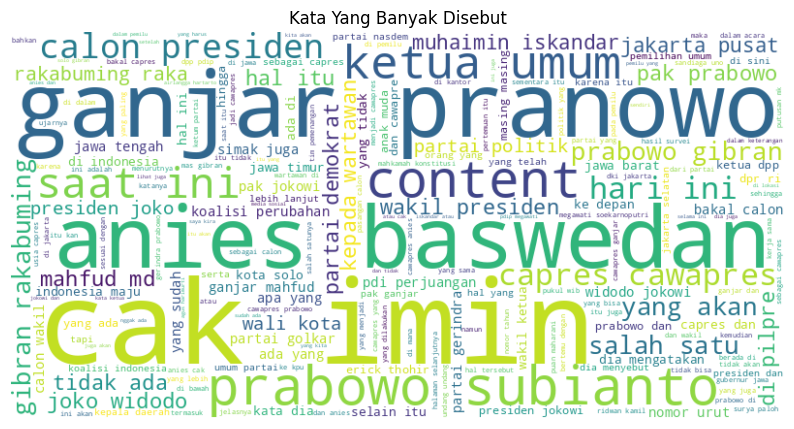

In [21]:
datax=df
datax['text22'] = datax['token_clean'].apply(lambda x: str(x).replace('[', '').replace(']', '').replace(',', '').replace("'",''))
#datax.head()
text2 = ' '.join(datax['text22'].dropna().astype(str))

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text2)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Kata Yang Banyak Disebut')
plt.show()

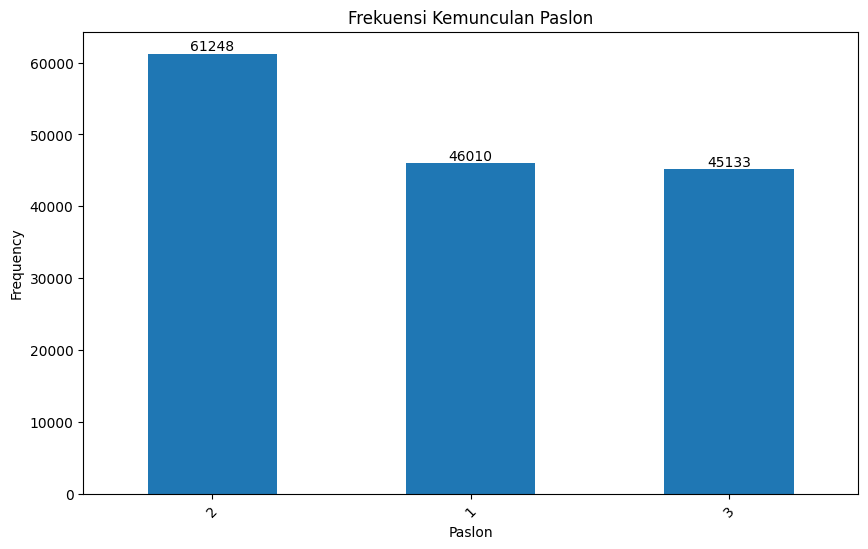

In [22]:
word_counts = (df['category'].str.split().explode()
                              .value_counts()
                              .sort_values(ascending=False)
                              .drop('paslon'))


# Plotting the word frequency
plt.figure(figsize=(10, 6))
ax = word_counts[:20].plot(kind='bar')  # Get the Axes object for label placement
#word_counts[:20].plot(kind='bar')
plt.xlabel('Paslon')
plt.ylabel('Frequency')
plt.title('Frekuensi Kemunculan Paslon')
plt.xticks(rotation=45)
# Add value labels above each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.0f}",  # Format the value as an integer
                (p.get_x() + p.get_width() / 2., p.get_height()),  # Place label above the bar
                ha='center', va='bottom')
plt.show()

### Pertanyaan 2: Seberapa besar hasil klasifikasi berita pemilu dengan metode LSTM?

In [23]:
!pip install tensorflow

In [24]:
import re, string
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalAveragePooling1D
from tensorflow.keras.callbacks import Callback, ModelCheckpoint

In [25]:
path_data = '/content/datasets/news_data.csv'
berita_pemilu = pd.read_csv(path_data)
berita_pemilu=berita_pemilu.dropna() # menghapus data missing value
berita_pemilu.reset_index(inplace=True, drop=True)
berita_pemilu.head()

,title,author,publish_date,article_text,url,main_image,tag
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,detikNews,2023-12-10 23:31:00+07:00,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,https://news.detik.com/pemilu/d-7082492/hasto-...,https://awsimages.detik.net.id/community/media...,"['hasto kristiyanto', 'hasto', 'sekjen pdip', ..."
1,Contoh Format dan Isi Surat Pernyataan Anggota...,detikNews,2023-12-10 22:38:00+07:00,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,https://news.detik.com/pemilu/d-7082424/contoh...,https://awsimages.detik.net.id/community/media...,"['surat pernyataan kpps pemilu 2024', 'pendaft..."
2,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,detikSumut,2023-12-10 22:23:00+07:00,Sekitar 9.000 personel dikerahkan untuk mengam...,https://www.detik.com/sumut/berita/d-7082448/9...,https://awsimages.detik.net.id/community/media...,"['natal', 'tahun baru', 'nataru', 'pengamanan ..."
3,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,detikNews,2023-12-10 22:12:00+07:00,Ukraina marah usai Rusia menjadikan empat wila...,https://news.detik.com/internasional/d-7082454...,https://awsimages.detik.net.id/community/media...,"['ukraina', 'rusia', 'pemilu rusia', 'round-up']"
4,TKN Prabowo-Gibran Buka Pintu untuk Eks KSAD D...,detikNews,2023-12-10 21:59:00+07:00,Sekretaris Tim Kampanye Nasional (TKN) Prabowo...,https://news.detik.com/pemilu/d-7082445/tkn-pr...,https://awsimages.detik.net.id/community/media...,"['tkn', 'prabowo-gibran', 'dudung abdurachman']"


In [26]:
def preprocess_text(text):
    '''Fungsi preprocess_text membersihkan dan siapkan teks paragraf untuk tokenisasi'''
    if not isinstance(text, str):
        return text

    lower_case = text.lower()
    hasil = re.sub(r'[,()\d]+', '', lower_case) # Menghapus angka, tanda kurung, dan koma
    hasil = re.sub(r'#\w+|@\w+', '', hasil) # Menghapus hashtag dan mention
    hasil = re.sub('<.*?>', ' ', hasil) # Menghapus karakter HTML
    hasil = re.sub('[^a-zA-Z0-9]', ' ', hasil) # Mempertimbangkan huruf dan angka
    hasil = re.sub("\n", " ", hasil)  # Mengganti line baru dengan spasi
    hasil = re.sub(r"\b[a-zA-Z]\b", " ", hasil) # Menghapus single char
    hasil = ' '.join(hasil.split()) # Memisahkan dan menggabungkan kata
    return hasil

In [27]:
def labeling_text(text, label_map):
  group_word = {key: [] for key in label_map.keys()}
  for word in text.split():
      for label, keywords in label_map.items():
          # Memeriksa apakah kata secara eksak cocok dengan salah satu keyword
          if word in keywords:
              group_word[label].append(word)

  # muncul setidaknya 10x dalam 1 dataset
  valid_data = {k: v for k, v in group_word.items() if len(v) > 10}
  if not valid_data:
        return np.nan

  label = max(valid_data, key=lambda k: len(valid_data[k])) if any(valid_data.values()) else np.nan
  return label

label_map={
    'paslon_1':[
        'anies', 'baswedan', 'anies baswedan',
        'amin', 'muhaimin','iskandar', 'muhaimin iskandar', 'cak imin',
        'anies muhaimin'
    ],
    'paslon_2':[
        'prabowo', 'subianto', 'prabowo subianto',
        'gibran', 'rakabuming', 'gibran rakabuming',
        'prabowo gibran'
    ],
    'paslon_3':[
        'ganjar', 'pranowo','ganjar pranowo',
        'mahfud',
        'ganjar mahfud'
    ]
}

In [28]:
df=berita_pemilu[['title', 'article_text']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17935 entries, 0 to 17934
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         17935 non-null  object
 1   article_text  17935 non-null  object
dtypes: object(2)
memory usage: 280.4+ KB


In [29]:
df['merge_title_article'] = df['title'] + ' ' + df['article_text']

# preses merge dataset
df['news'] = df['merge_title_article'].apply(preprocess_text)
df.drop(columns=['merge_title_article'], inplace=True)
df.head()

,title,article_text,news
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,hasto ingin debat pilpres pertarungan gagasan ...
1,Contoh Format dan Isi Surat Pernyataan Anggota...,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,contoh format dan isi surat pernyataan anggota...
2,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,Sekitar 9.000 personel dikerahkan untuk mengam...,ribu personel gabungan dikerahkan amankan nata...
3,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,Ukraina marah usai Rusia menjadikan empat wila...,amarah ukraina usai rusia bakal gelar pilpres ...
4,TKN Prabowo-Gibran Buka Pintu untuk Eks KSAD D...,Sekretaris Tim Kampanye Nasional (TKN) Prabowo...,tkn prabowo gibran buka pintu untuk eks ksad d...


In [30]:
df['label'] = df['news'].apply(lambda x: labeling_text(x, label_map))
df.head()

,title,article_text,news,label
0,Hasto Ingin Debat Pilpres Pertarungan Gagasan ...,Sekjen PDIP sekaligus Sekretaris Tim Pemenang ...,hasto ingin debat pilpres pertarungan gagasan ...,NaN
1,Contoh Format dan Isi Surat Pernyataan Anggota...,Surat pernyataan KPPS Pemilu 2024 merupakan ba...,contoh format dan isi surat pernyataan anggota...,NaN
2,9 Ribu Personel Gabungan Dikerahkan Amankan Na...,Sekitar 9.000 personel dikerahkan untuk mengam...,ribu personel gabungan dikerahkan amankan nata...,NaN
3,Amarah Ukraina Usai Rusia Bakal Gelar Pilpres ...,Ukraina marah usai Rusia menjadikan empat wila...,amarah ukraina usai rusia bakal gelar pilpres ...,NaN
4,TKN Prabowo-Gibran Buka Pintu untuk Eks KSAD D...,Sekretaris Tim Kampanye Nasional (TKN) Prabowo...,tkn prabowo gibran buka pintu untuk eks ksad d...,NaN


In [31]:
df=df.dropna() # menghapus data missing value
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7127 entries, 5 to 17933
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   title         7127 non-null   object
 1   article_text  7127 non-null   object
 2   news          7127 non-null   object
 3   label         7127 non-null   object
dtypes: object(4)
memory usage: 278.4+ KB


In [32]:
# Jumlah berita berdasarkan paslon
df.groupby('label')['news'].count().reset_index(name='Topik Berita')

,label,Topik Berita
0,paslon_1,2045
1,paslon_2,3105
2,paslon_3,1977


In [33]:
df_model = df[['news', 'label']]
df_model.reset_index(inplace=True, drop=True)
category = pd.get_dummies(df_model.label).astype(int)

df_model=pd.concat([df_model, category], axis=1)
df_model = df_model.drop(columns='label')
df_model.head()

,news,paslon_1,paslon_2,paslon_3
0,gibran dadakan makan gultik di blok malam ini ...,0,1,0
1,tpn ganjar mahfud anggap dukungan abuya muhtad...,0,0,1
2,tkn prabowo ke marapi sebagai menhan wajar nai...,0,1,0
3,prabowo gibran siap hadapi debat pertama pilpr...,0,1,0
4,debat perdana pilpres tpd jabar ganjar mahfud ...,0,0,1


In [34]:
news = df_model['news'].values
label = df_model[['paslon_1', 'paslon_2', 'paslon_3']].values

news_train, news_test, label_train, label_test = train_test_split(news, label, test_size=0.2)

In [35]:
tokenizer = Tokenizer(num_words=20000, oov_token='x')
tokenizer.fit_on_texts(news_train)
tokenizer.fit_on_texts(news_test)

sekuens_train = tokenizer.texts_to_sequences(news_train)
sekuens_test = tokenizer.texts_to_sequences(news_test)

padded_train = pad_sequences(sekuens_train, maxlen=8958)
padded_test = pad_sequences(sekuens_test, maxlen=8958)

In [36]:
import pickle
# Simpan tokenizer ke dalam file
with open("./tokenizer.pkl", 'wb') as f:
    pickle.dump(tokenizer, f)

padded_train.shape

(5701, 8958)

In [60]:
model = Sequential()
model.add(Embedding(input_dim=20000, output_dim=100, input_length=8958))
model.add(LSTM(64, return_sequences=True))
model.add(GlobalAveragePooling1D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 8958, 100)         2000000   
                                                                 
 lstm_4 (LSTM)               (None, 8958, 64)          42240     
                                                                 
 global_average_pooling1d_4  (None, 64)                0         
  (GlobalAveragePooling1D)                                       
                                                                 
 dense_20 (Dense)            (None, 512)               33280     
                                                                 
 dropout_8 (Dropout)         (None, 512)               0         
                                                                 
 dense_21 (Dense)            (None, 256)               131328    
                                                      

In [61]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('val_accuracy') > 0.99:
            self.model.stop_training = True

callbacks = MyCallback()

In [62]:
num_epochs = 30
batch_size = 100

history = model.fit(
    padded_train,
    label_train,
    epochs=num_epochs,
    validation_data=(padded_test, label_test),
    verbose=1,
    batch_size=batch_size,
    callbacks=[
            callbacks,
        ],
)

Epoch 1/30
58/58 [==============================] - 30s 404ms/step - loss: 1.0792 - accuracy: 0.4333 - val_loss: 1.0746 - val_accuracy: 0.4404
Epoch 2/30
58/58 [==============================] - 23s 393ms/step - loss: 1.0776 - accuracy: 0.4345 - val_loss: 1.0765 - val_accuracy: 0.4404
Epoch 3/30
58/58 [==============================] - 21s 362ms/step - loss: 0.8602 - accuracy: 0.5332 - val_loss: 0.5633 - val_accuracy: 0.6964
Epoch 4/30
58/58 [==============================] - 23s 390ms/step - loss: 0.5279 - accuracy: 0.6941 - val_loss: 0.4881 - val_accuracy: 0.7195
Epoch 5/30
58/58 [==============================] - 23s 398ms/step - loss: 0.4560 - accuracy: 0.7592 - val_loss: 0.4851 - val_accuracy: 0.7672
Epoch 6/30
58/58 [==============================] - 21s 357ms/step - loss: 0.3770 - accuracy: 0.8411 - val_loss: 0.3016 - val_accuracy: 0.9011
Epoch 7/30
58/58 [==============================] - 22s 375ms/step - loss: 0.1913 - accuracy: 0.9411 - val_loss: 0.2828 - val_accuracy: 0.9102

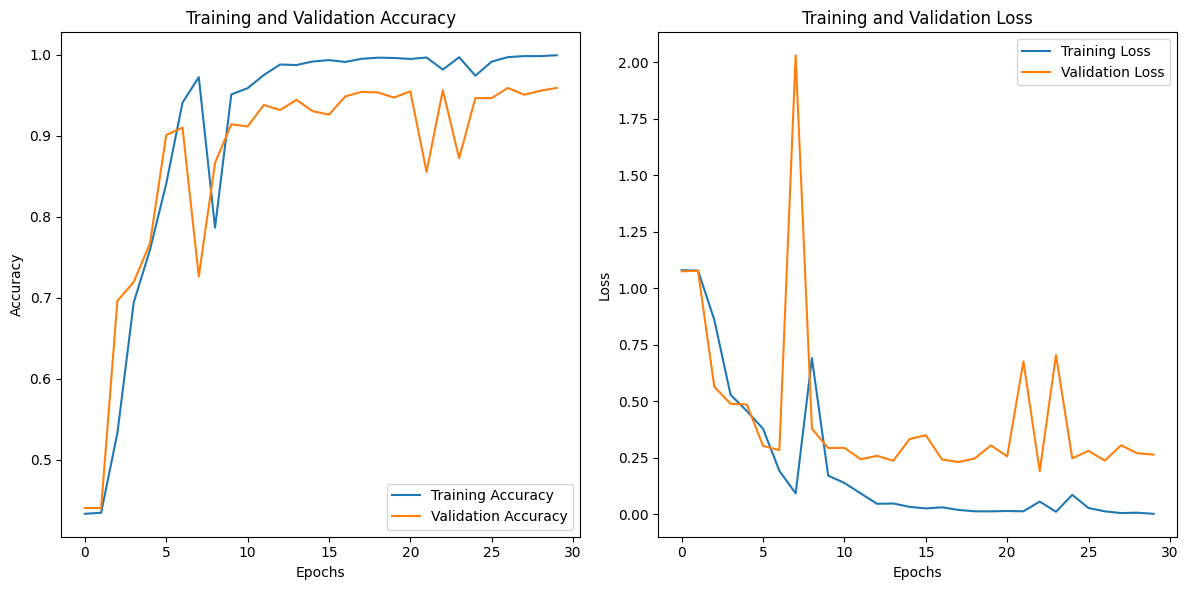

In [63]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# plot loss
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# plot akurasi
plt.subplot(1, 2, 1)
plt.plot(train_acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Tampilkan plot
plt.tight_layout()
plt.show()

In [64]:
def predict_data_sample(model, tokenizer, data_sample):
    sequences_data_sample = tokenizer.texts_to_sequences(data_sample)
    padded_data_sample = pad_sequences(sequences_data_sample, maxlen=8958)
    predictions = model.predict(padded_data_sample)
    predicted_labels = np.argmax(predictions, axis=1) +1
    return [f'paslon_{num}' for num in predicted_labels]

tokenizer_path = './tokenizer.pkl'
with open(tokenizer_path, 'rb') as token:
    tokenizer = pickle.load(token)

In [65]:
df_sample = df_model.iloc[:10].copy()

original=df_sample[['paslon_1', 'paslon_2', 'paslon_3']].idxmax(axis=1)
sample = df_sample['news'].tolist()

data_predict = predict_data_sample(model, tokenizer, sample) # Melakukan prediksi

for ori, pred in zip(original, data_predict):
  print(f"Original: {ori}, Predict: {pred}, ==> {'Benar' if ori==pred else 'Salah'}")

1/1 [==============================] - 1s 643ms/step
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_3, Predict: paslon_3, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_3, Predict: paslon_3, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar
Original: paslon_1, Predict: paslon_1, ==> Benar
Original: paslon_2, Predict: paslon_2, ==> Benar


In [66]:
import h5py
model.save("model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Conclusion

Berdasarkan hasil diatas dapat disimpulkan sebagaimana berikut
- Data pasangan calon presiden-wakil presiden sangat sering muncul pada pemberitaan nasional dimana paling banyak di bulan november dengan paslon nomor urut 2 sering muncul dalam berita.
- Model yang dibangun berhasil mengklasifikasi berita berkaitan dengan pemilu berdasarkan paslon yang dibahas dengan akurasi mencapai 95%